# Newcode

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
excercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [3]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
data = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
data.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [5]:
data

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


### 데이터타입, 결측값, 컬럼 확인

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.isnull().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

In [8]:
data.columns

Index(['Chins', 'Situps', 'Jumps', 'Weight', 'Waist', 'Pulse'], dtype='object')

### EDA 수행

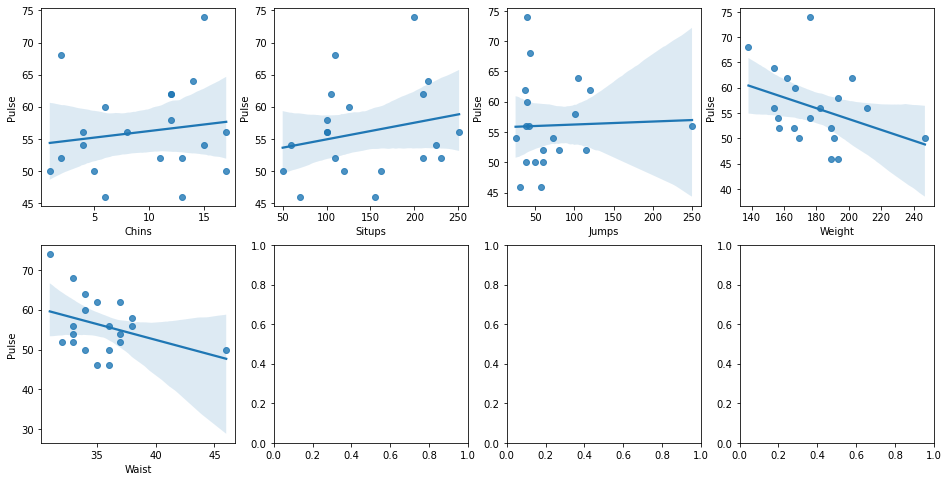

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins', 'Situps', 'Jumps', 'Weight', 'Waist']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pulse', data=data, ax=axs[row][col])

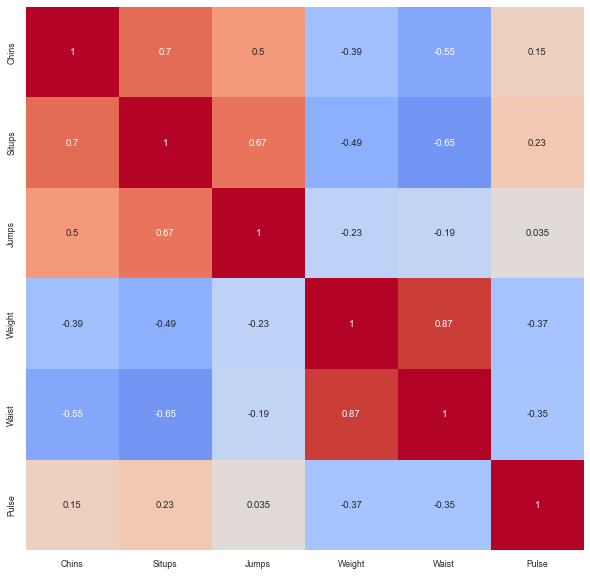

In [10]:
df_corr = data.astype(float).corr()
colormap = plt.cm.coolwarm
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap=colormap, vmin=-1., vmax=1.)
plt.show()

### 데이터 나누기

In [11]:
y = data['Pulse']
y

0     50.0
1     52.0
2     58.0
3     62.0
4     46.0
5     56.0
6     56.0
7     60.0
8     74.0
9     56.0
10    50.0
11    52.0
12    64.0
13    50.0
14    46.0
15    62.0
16    54.0
17    52.0
18    54.0
19    68.0
Name: Pulse, dtype: float64

In [12]:
X = data.drop(['Pulse'], axis = 1)
X

,Chins,Situps,Jumps,Weight,Waist
0,5.0,162.0,60.0,191.0,36.0
1,2.0,110.0,60.0,189.0,37.0
2,12.0,101.0,101.0,193.0,38.0
3,12.0,105.0,37.0,162.0,35.0
4,13.0,155.0,58.0,189.0,35.0
5,4.0,101.0,42.0,182.0,36.0
6,8.0,101.0,38.0,211.0,38.0
7,6.0,125.0,40.0,167.0,34.0
8,15.0,200.0,40.0,176.0,31.0
9,17.0,251.0,250.0,154.0,33.0


In [13]:
from sklearn.model_selection import train_test_split
X = X.iloc[:,0:5].values
X

array([[  5., 162.,  60., 191.,  36.],
       [  2., 110.,  60., 189.,  37.],
       [ 12., 101., 101., 193.,  38.],
       [ 12., 105.,  37., 162.,  35.],
       [ 13., 155.,  58., 189.,  35.],
       [  4., 101.,  42., 182.,  36.],
       [  8., 101.,  38., 211.,  38.],
       [  6., 125.,  40., 167.,  34.],
       [ 15., 200.,  40., 176.,  31.],
       [ 17., 251., 250., 154.,  33.],
       [ 17., 120.,  38., 169.,  34.],
       [ 13., 210., 115., 166.,  33.],
       [ 14., 215., 105., 154.,  34.],
       [  1.,  50.,  50., 247.,  46.],
       [  6.,  70.,  31., 193.,  36.],
       [ 12., 210., 120., 202.,  37.],
       [  4.,  60.,  25., 176.,  37.],
       [ 11., 230.,  80., 157.,  32.],
       [ 15., 225.,  73., 156.,  33.],
       [  2., 110.,  43., 138.,  33.]])

In [14]:
X.shape

(20, 5)

In [15]:
y.shape

(20,)

In [16]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
import numpy as np
# 이제 X_train, X_test, y_train, y_test를 사용하여 모델을 훈련하고 평가할 수 있습니다.
    # 각 반복마다 다른 데이터 세트를 사용하여 모델을 평가하게 됩니다.
    # 모델 훈련 및 평가

# KFold를 사용하여 5-겹 교차 검증 수행
kf = KFold(n_splits=5, random_state=0, shuffle=True)

# 평균
meanList = []

# 표준편차
stdList = []

# 표준화 값
X_trainList = []
X_testList = []

y_testList = []

modelList = []
model_historyList = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_testList.append(y_test)
    
    # 평균
    mean = np.mean(X_train, axis = 0)
    meanList.append(mean)
    
    # 표준편차
    std = np.std(X_train, axis = 0) # 표준편차값
    stdList.append(std)
    
    # 표준화값
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    X_trainList.append(X_train)
    X_testList.append(X_test)
    
    model = Sequential()

    # 1D 합성곱 레이어 (Conv1D) 추가
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(5, 1)))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(5, 1)))

    # 맥스 풀링 레이어 추가
    model.add(MaxPooling1D(pool_size=1))

    # LSTM 레이어 추가
    model.add(LSTM(50, activation='relu', input_shape=(5, 1)))
    
    # Flatten 레이어 추가
    model.add(Flatten())

    # 출력 레이어 추가
    model.add(Dense(1)) 
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])
    
    modelList.append(model)
    
    # 데이터를 1D CNN 입력 형태에 맞게 재구성
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    
    # 모델 학습
    model_historyList.append(model.fit(x=X_train, y=y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)))


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3011.8936 - mse: 3011.8936 - val_loss: 3917.0996 - val_mse: 3917.0996
Epoch 2/100
1/1 [==============================] - 0s 43ms/step - loss: 3002.6182 - mse: 3002.6182 - val_loss: 3906.9397 - val_mse: 3906.9397
Epoch 3/100
1/1 [==============================] - 0s 57ms/step - loss: 2993.6936 - mse: 2993.6936 - val_loss: 3894.6963 - val_mse: 3894.6963
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 2982.6299 - mse: 2982.6299 - val_loss: 3878.9229 - val_mse: 3878.9229
Epoch 5/100
1/1 [==============================] - 0s 50ms/step - loss: 2968.3545 - mse: 2968.3545 - val_loss: 3858.0310 - val_mse: 3858.0310
Epoch 6/100
1/1 [==============================] - 0s 50ms/step - loss: 2948.9902 - mse: 2948.9902 - val_loss: 3830.0161 - val_mse: 3830.0161
Epoch 7/100
1/1 [==============================] - 0s 50ms/step - loss: 2922.1499 - mse: 2922.1499 - val_loss: 3791.7122 - val_mse: 3791.7122
Epoch 8/

1/1 [==============================] - 0s 41ms/step - loss: 127.6941 - mse: 127.6941 - val_loss: 114.4292 - val_mse: 114.4292
Epoch 60/100
1/1 [==============================] - 0s 47ms/step - loss: 125.2431 - mse: 125.2431 - val_loss: 67.7831 - val_mse: 67.7831
Epoch 61/100
1/1 [==============================] - 0s 42ms/step - loss: 119.8658 - mse: 119.8658 - val_loss: 108.7751 - val_mse: 108.7751
Epoch 62/100
1/1 [==============================] - 0s 38ms/step - loss: 117.3189 - mse: 117.3189 - val_loss: 66.3831 - val_mse: 66.3831
Epoch 63/100
1/1 [==============================] - 0s 40ms/step - loss: 112.6402 - mse: 112.6402 - val_loss: 104.5703 - val_mse: 104.5703
Epoch 64/100
1/1 [==============================] - 0s 44ms/step - loss: 110.5751 - mse: 110.5751 - val_loss: 64.8228 - val_mse: 64.8228
Epoch 65/100
1/1 [==============================] - 0s 46ms/step - loss: 106.6721 - mse: 106.6721 - val_loss: 103.2350 - val_mse: 103.2350
Epoch 66/100
1/1 [============================

1/1 [==============================] - 0s 42ms/step - loss: 1019.0934 - mse: 1019.0934 - val_loss: 594.4058 - val_mse: 594.4058
Epoch 19/100
1/1 [==============================] - 0s 43ms/step - loss: 813.3212 - mse: 813.3212 - val_loss: 656.5604 - val_mse: 656.5604
Epoch 20/100
1/1 [==============================] - 0s 46ms/step - loss: 686.6265 - mse: 686.6265 - val_loss: 741.0185 - val_mse: 741.0185
Epoch 21/100
1/1 [==============================] - 0s 47ms/step - loss: 616.6616 - mse: 616.6616 - val_loss: 806.0294 - val_mse: 806.0294
Epoch 22/100
1/1 [==============================] - 0s 49ms/step - loss: 576.3956 - mse: 576.3956 - val_loss: 840.8483 - val_mse: 840.8483
Epoch 23/100
1/1 [==============================] - 0s 48ms/step - loss: 548.0935 - mse: 548.0935 - val_loss: 853.7648 - val_mse: 853.7648
Epoch 24/100
1/1 [==============================] - 0s 49ms/step - loss: 524.4839 - mse: 524.4839 - val_loss: 853.9026 - val_mse: 853.9026
Epoch 25/100
1/1 [====================

1/1 [==============================] - 0s 42ms/step - loss: 82.6156 - mse: 82.6156 - val_loss: 308.0483 - val_mse: 308.0483
Epoch 78/100
1/1 [==============================] - 0s 38ms/step - loss: 81.9777 - mse: 81.9777 - val_loss: 540.9282 - val_mse: 540.9282
Epoch 79/100
1/1 [==============================] - 0s 39ms/step - loss: 77.7563 - mse: 77.7563 - val_loss: 308.6078 - val_mse: 308.6078
Epoch 80/100
1/1 [==============================] - 0s 38ms/step - loss: 76.9665 - mse: 76.9665 - val_loss: 533.6093 - val_mse: 533.6093
Epoch 81/100
1/1 [==============================] - 0s 38ms/step - loss: 72.9501 - mse: 72.9501 - val_loss: 309.9133 - val_mse: 309.9133
Epoch 82/100
1/1 [==============================] - 0s 38ms/step - loss: 72.2090 - mse: 72.2090 - val_loss: 529.4053 - val_mse: 529.4053
Epoch 83/100
1/1 [==============================] - 0s 44ms/step - loss: 68.8024 - mse: 68.8024 - val_loss: 306.3882 - val_mse: 306.3882
Epoch 84/100
1/1 [==============================] - 0s

Epoch 36/100
1/1 [==============================] - 0s 59ms/step - loss: 330.8343 - mse: 330.8343 - val_loss: 270.0996 - val_mse: 270.0996
Epoch 37/100
1/1 [==============================] - 0s 54ms/step - loss: 317.2719 - mse: 317.2719 - val_loss: 258.2757 - val_mse: 258.2757
Epoch 38/100
1/1 [==============================] - 0s 48ms/step - loss: 304.5013 - mse: 304.5013 - val_loss: 253.5225 - val_mse: 253.5225
Epoch 39/100
1/1 [==============================] - 0s 50ms/step - loss: 292.4753 - mse: 292.4753 - val_loss: 240.7894 - val_mse: 240.7894
Epoch 40/100
1/1 [==============================] - 0s 45ms/step - loss: 281.0826 - mse: 281.0826 - val_loss: 239.8191 - val_mse: 239.8191
Epoch 41/100
1/1 [==============================] - 0s 47ms/step - loss: 270.4809 - mse: 270.4809 - val_loss: 223.8589 - val_mse: 223.8589
Epoch 42/100
1/1 [==============================] - 0s 46ms/step - loss: 260.5731 - mse: 260.5731 - val_loss: 231.4414 - val_mse: 231.4414
Epoch 43/100
1/1 [=========

1/1 [==============================] - 0s 42ms/step - loss: 75.7629 - mse: 75.7629 - val_loss: 90.8957 - val_mse: 90.8957
Epoch 96/100
1/1 [==============================] - 0s 43ms/step - loss: 73.2165 - mse: 73.2165 - val_loss: 101.7502 - val_mse: 101.7502
Epoch 97/100
1/1 [==============================] - 0s 44ms/step - loss: 74.0334 - mse: 74.0334 - val_loss: 89.9626 - val_mse: 89.9626
Epoch 98/100
1/1 [==============================] - 0s 44ms/step - loss: 71.3609 - mse: 71.3609 - val_loss: 99.9051 - val_mse: 99.9051
Epoch 99/100
1/1 [==============================] - 0s 41ms/step - loss: 72.2142 - mse: 72.2142 - val_loss: 88.8792 - val_mse: 88.8792
Epoch 100/100
1/1 [==============================] - 0s 45ms/step - loss: 69.4953 - mse: 69.4953 - val_loss: 97.9966 - val_mse: 97.9966
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3221.6274 - mse: 3221.6274 - val_loss: 3068.9341 - val_mse: 3068.9341
Epoch 2/100
1/1 [==============================] - 0s 47ms/s

1/1 [==============================] - 0s 51ms/step - loss: 143.0906 - mse: 143.0906 - val_loss: 2090.9507 - val_mse: 2090.9507
Epoch 54/100
1/1 [==============================] - 0s 51ms/step - loss: 138.8022 - mse: 138.8022 - val_loss: 2619.8457 - val_mse: 2619.8457
Epoch 55/100
1/1 [==============================] - 0s 55ms/step - loss: 133.2853 - mse: 133.2853 - val_loss: 2049.9824 - val_mse: 2049.9824
Epoch 56/100
1/1 [==============================] - 0s 49ms/step - loss: 129.5715 - mse: 129.5715 - val_loss: 2487.1018 - val_mse: 2487.1018
Epoch 57/100
1/1 [==============================] - 0s 53ms/step - loss: 125.3469 - mse: 125.3469 - val_loss: 1975.2721 - val_mse: 1975.2721
Epoch 58/100
1/1 [==============================] - 0s 48ms/step - loss: 122.3237 - mse: 122.3237 - val_loss: 2397.6628 - val_mse: 2397.6628
Epoch 59/100
1/1 [==============================] - 0s 46ms/step - loss: 118.9467 - mse: 118.9467 - val_loss: 1873.6095 - val_mse: 1873.6095
Epoch 60/100
1/1 [========

1/1 [==============================] - 0s 41ms/step - loss: 2844.4873 - mse: 2844.4873 - val_loss: 3252.8472 - val_mse: 3252.8472
Epoch 12/100
1/1 [==============================] - 0s 51ms/step - loss: 2735.2710 - mse: 2735.2710 - val_loss: 3115.5127 - val_mse: 3115.5127
Epoch 13/100
1/1 [==============================] - 0s 43ms/step - loss: 2582.9102 - mse: 2582.9102 - val_loss: 2920.3640 - val_mse: 2920.3640
Epoch 14/100
1/1 [==============================] - 0s 44ms/step - loss: 2383.0862 - mse: 2383.0862 - val_loss: 2657.5212 - val_mse: 2657.5212
Epoch 15/100
1/1 [==============================] - 0s 47ms/step - loss: 2135.6250 - mse: 2135.6250 - val_loss: 2327.9275 - val_mse: 2327.9275
Epoch 16/100
1/1 [==============================] - 0s 41ms/step - loss: 1847.8379 - mse: 1847.8379 - val_loss: 1952.4454 - val_mse: 1952.4454
Epoch 17/100
1/1 [==============================] - 0s 43ms/step - loss: 1540.7141 - mse: 1540.7141 - val_loss: 1573.8269 - val_mse: 1573.8269
Epoch 18/100

Epoch 70/100
1/1 [==============================] - 0s 46ms/step - loss: 103.8764 - mse: 103.8764 - val_loss: 223.6474 - val_mse: 223.6474
Epoch 71/100
1/1 [==============================] - 0s 46ms/step - loss: 100.1752 - mse: 100.1752 - val_loss: 310.8701 - val_mse: 310.8701
Epoch 72/100
1/1 [==============================] - 0s 48ms/step - loss: 98.2152 - mse: 98.2152 - val_loss: 219.0683 - val_mse: 219.0683
Epoch 73/100
1/1 [==============================] - 0s 53ms/step - loss: 95.3026 - mse: 95.3026 - val_loss: 304.7178 - val_mse: 304.7178
Epoch 74/100
1/1 [==============================] - 0s 55ms/step - loss: 93.8311 - mse: 93.8311 - val_loss: 212.4782 - val_mse: 212.4782
Epoch 75/100
1/1 [==============================] - 0s 51ms/step - loss: 91.3940 - mse: 91.3940 - val_loss: 302.9846 - val_mse: 302.9846
Epoch 76/100
1/1 [==============================] - 0s 54ms/step - loss: 90.4344 - mse: 90.4344 - val_loss: 204.1853 - val_mse: 204.1853
Epoch 77/100
1/1 [===================

In [17]:
for i in range(5):
    modelList[i].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             8256      
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 64)             0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 50)                23000     
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                        

In [18]:
for i in range (5):
    print(f"model {i}")
    X_test = X_testList[i]
    y_test = y_testList[i]
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    modelList[i].evaluate(X_test, y_test)

model 0
1/1 [==============================] - 0s 48ms/step - loss: 55.5209 - mse: 55.5209
model 1
1/1 [==============================] - 0s 39ms/step - loss: 542.3121 - mse: 542.3121
model 2
1/1 [==============================] - 0s 30ms/step - loss: 97.9966 - mse: 97.9966
model 3
1/1 [==============================] - 0s 30ms/step - loss: 1452.2300 - mse: 1452.2300
model 4
1/1 [==============================] - 0s 32ms/step - loss: 159.8268 - mse: 159.8268


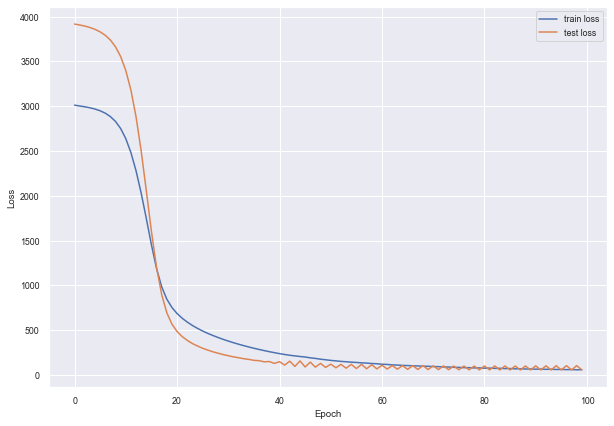

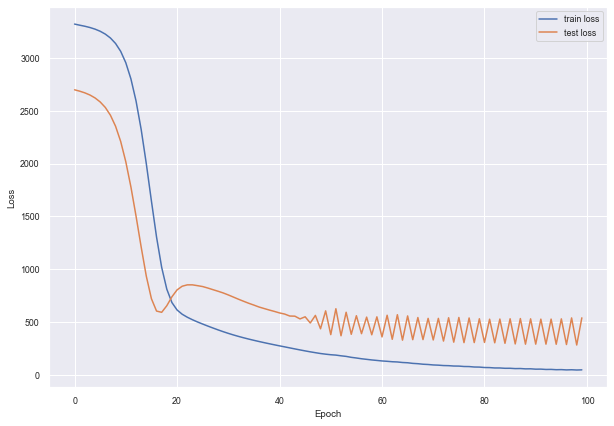

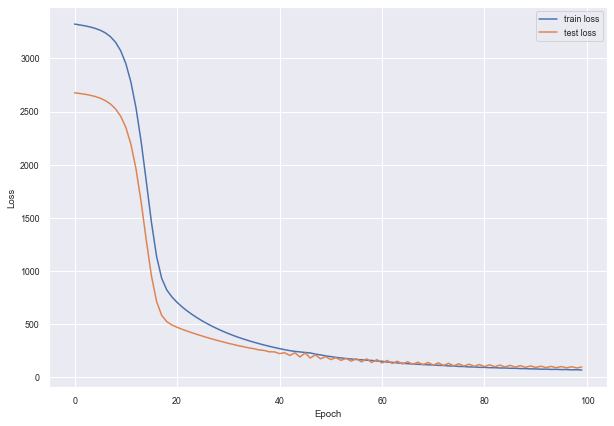

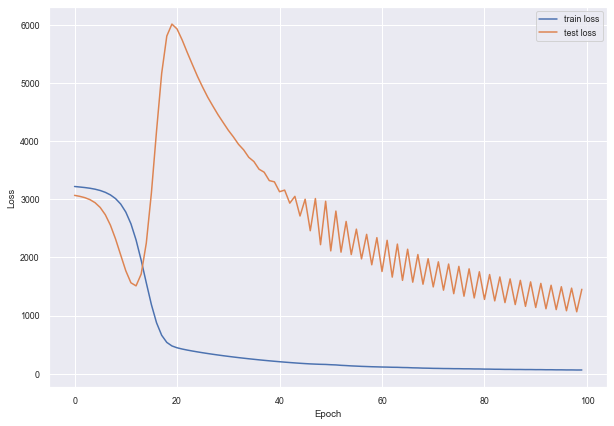

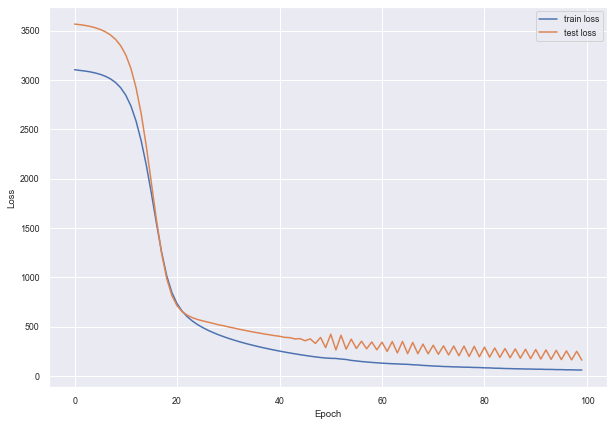

In [19]:
# loss 체크
for i in range(5):
    plt.figure(figsize=(10,7))
    plt.plot(range(100), model_historyList[i].history['loss'], label='train loss')
    plt.plot(range(100), model_historyList[i].history['val_loss'], label='test loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()